# Statistik und fitting!

Wir bauen uns ein Konzentrations über pH diagramm!

In [99]:
from pHcalc import Acid, Inert, System
import numpy as np
import matplotlib.pyplot as plt

In [100]:
#wir nehmen als allererstes HCl welches komplett in wasser dissoziieren sollte!
# aus der dokumentation:  H3O+ and Cl-. Because H3O+ is adjusted internally, all you need to define is Cl-. 
# This implies a single equivalent of H3O+ in order to balance the charge of the system.
cl = Inert(charge=-1, conc=0.01)
system = System(cl)
system.pHsolve()
print(system.pH) # Should print 1.9999



1.9999977111816385


Warum ist das so? Was sagt der pH wert aus?

Aufgabe 1: Berechnen Sie alle pH Werte für alle Konzentrationen von HCl von $10^{-9}$ bis $1$ Mol/L und plotten Sie das Ergebnis. Die schritte sollten pro Dekade immer 10 Messpunkte haben!

In [101]:
np.array([1,2,3])*5

array([ 5, 10, 15])

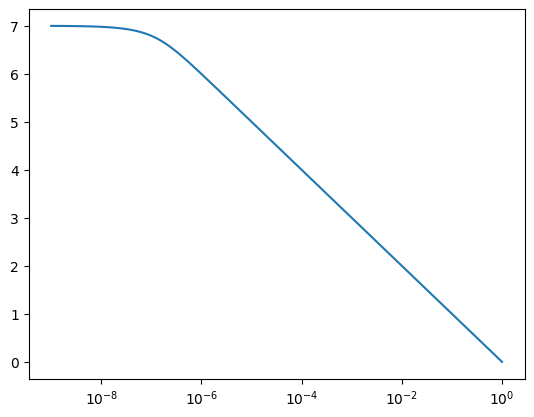

In [102]:
#ihr code hier
concli = np.geomspace(10**-9,1,100) 
pHli = []
for conc in concli:
    cl = Inert(charge=-1, conc=conc)
    system = System(cl)
    system.pHsolve()
    pHli.append(system.pH)

plt.semilogx(concli,pHli)

Nun das ganze mit NaOH

In [103]:
na = Inert(charge=1, conc=0.01)
system = System(na)
system.pHsolve()
print(system.pH) # Should print 12.00000

12.000002288818362


Titrieren sie nun $10^{-9}$ bis $1$ Mol/L NaOH und plotten sie den pH wert!

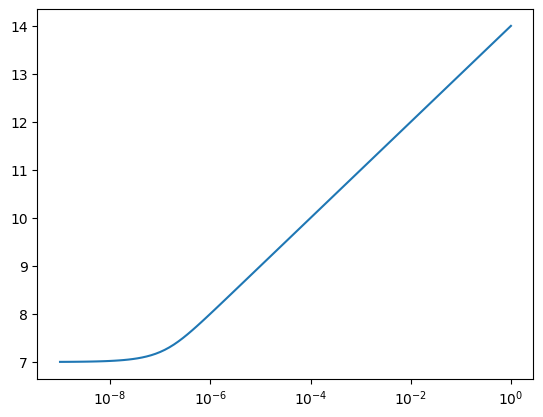

In [104]:
#ihr code hier
concli = np.geomspace(10**-9,1,100) 
pHli = []
for conc in concli:
    na = Inert(charge=1, conc=conc)
    system = System(na)
    system.pHsolve()
    pHli.append(system.pH)

plt.semilogx(concli,pHli)

Wie immer können wir auch gefährliche Dinge sehr easy im computer lösen!
Titrieren sie nun HF von $10^{-9}$ bis 1 Mol/L in 1000 Schritten.

2.6413261413574203


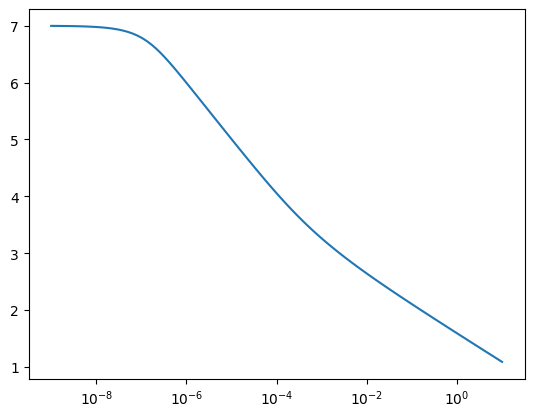

In [105]:
#Beispielcode
hf = Acid(Ka=6.76e-4, charge=0, conc=0.01)
# hf = Acid(pKa=3.17, charge=0, conc=0.01) will also work
system = System(hf)
system.pHsolve()
print(system.pH) # Should print 2.6413261

#ihr code hier
concli = np.geomspace(10**-9,10,100) 
pHli = []
for conc in concli:
    hf = Acid(Ka=6.76e-4, charge=0, conc=conc)
    system = System(hf)
    system.pHsolve()
    pHli.append(system.pH)

plt.semilogx(concli,pHli)

# Kompliziertes beispiel $(NH_4)_3PO_4$

8.95915298461914


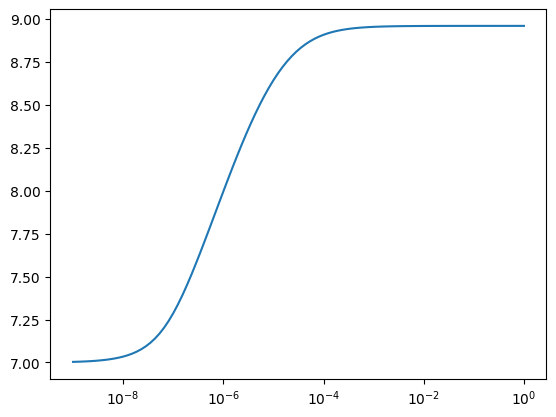

In [106]:
# Bitte ebenfalls von 10**-9 bis 1 plotten
phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=0.01)
nh4 = Acid(pKa=9.25, charge=1, conc=0.01*3)
system = System(phos, nh4)
system.pHsolve()
print(system.pH) # Should print 8.95915298


#ihr code hier
concli = np.geomspace(10**-9,1,100) 
pHli = []
for conc in concli:
    phos = Acid(pKa=[2.148, 7.198, 12.319], charge=0, conc=conc)
    nh4 = Acid(pKa=9.25, charge=1, conc=conc*3)
    system = System(phos, nh4)
    system.pHsolve()
    pHli.append(system.pH)

plt.semilogx(concli,pHli)

# Finally Some Data Science!

Was wenn wir die pKa werte nicht wissen?

Wir nehmen mal an, dass die folgende Simulation eine Messung sei!

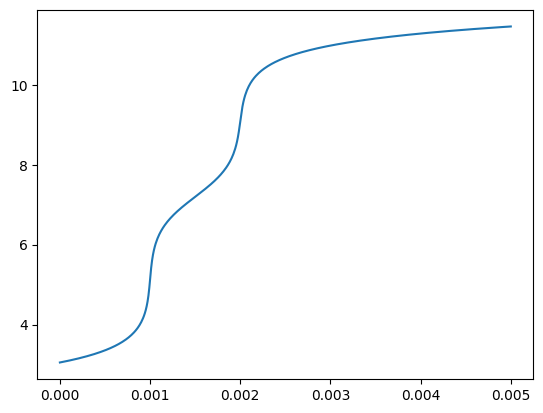

In [107]:
#  H3PO4 with NaOH aber linear!
na_moles = np.linspace(1e-8, 5.e-3, 500)
sol_volume = 1. # Liter
phos = Acid(pKa=[2.148, 7.198, 12.375], charge=0, conc=1.e-3)
phs = []
for mol in na_moles:
     na = Inert(charge=1, conc=mol/sol_volume)
     system = System(phos, na)
     system.pHsolve(guess_est=True)
     phs.append(system.pH)
plt.plot(na_moles, phs)
plt.show()

Messungen haben idR etwas Unsicherheit und daher Rauschen ... fügen wir das hinzu! 

In [108]:
phs_noise = np.array(phs) + np.random.normal(0,0.1,len(phs))

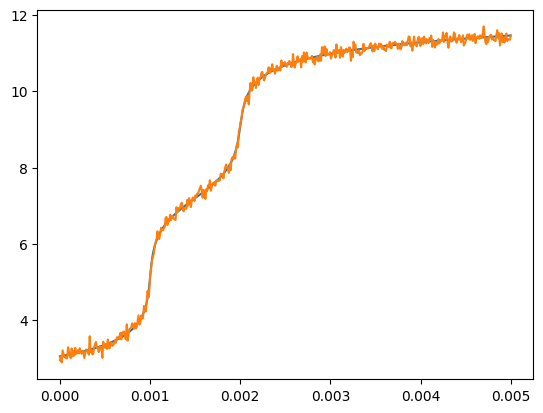

In [109]:
plt.plot(na_moles, phs)
plt.plot(na_moles, phs_noise)
plt.show()

Plotten Sie als histogramm nun nur den Fehler aus der "perfekten" simlation und unserer "fake messung" welche verrauscht ist.

Berechnen Sie den MSE, MAE, R2, Fehlervarianz und den Absoluten Fehler

0.009613892012196586
0.07748319590421782
0.9771957055633967


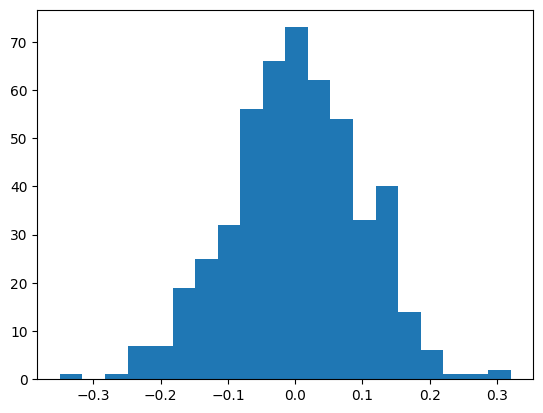

In [110]:
#die differenz als histogramm plotten

diff = np.array(phs)-np.array(phs_noise)

_ = plt.hist(diff,20)

mse = np.mean(diff**2)
print(mse)
mae = np.mean(np.abs(diff))
print(mae)

r2 = 1-np.mean(diff**2/(phs-np.mean(phs))**2)
print(r2)

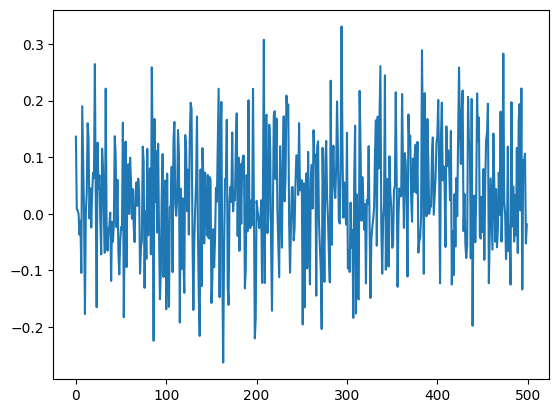

In [111]:
fehler = np.random.normal(0,0.1,len(phs))+na_moles*10
plt.plot(fehler)

Wie könnten wir die pKa/pkS werte herausfinden wenn wir nun wirklich eine Messung vorliegen hätten?
Ausprobieren?
Fitten!

Schreiben Sie zunächst eine funktion welche den pH berechner wenn eine liste von länge 3 übergeben wird

Hier ist ein Beispielcode zum fitten mittels scipy optimize minimize:

In [112]:
import numpy as np
from scipy.optimize import minimize

# Definiere die Zielfunktion, die Sie minimieren möchten
def objective_function(params):
    x, y = params
    # Beispiel: Quadratische Funktion (ersetze sie durch deine Funktion)
    return (x - 2)**2 + (y - 3)**2

# Setze die Startwerte für die Parameter
initial_guess = [0.0, 0.0]

# Optional: Definiere Nebenbedingungen (Gleichungen oder Ungleichungen)
#constraints = [
#    # Beispiel für eine Gleichung: x + y + z = 1
#    {'type': 'eq', 'fun': lambda params: params[0] + params[1] - 1}
#]

bounds = [
    (None, None),  # Keine Grenze für x
    (0, None),     # y ≥ 0
]

# Führe die Optimierung durch
result = minimize(
    objective_function,
    initial_guess,
    method='SLSQP',  # Ändere den Algorithmus, falls erforderlich
    bounds=bounds#,
    #constraints=constraints
)

if result.success:
    print("Optimierung erfolgreich!")
    print("Optimale Parameter:", result.x)
else:
    print("Optimierung fehlgeschlagen:", result.message)

print("Minimaler Wert der Zielfunktion:", result.fun)


Optimierung erfolgreich!
Optimale Parameter: [2. 3.]
Minimaler Wert der Zielfunktion: 0.0


In [113]:
# wir schreiben das nun mit dem MSE i.e. wenn wir eine weitere funktion anfitten wollen würden


(-7.723067766667625, 11.94502302489117, 0.3261806589707979, 7.052422885483674)

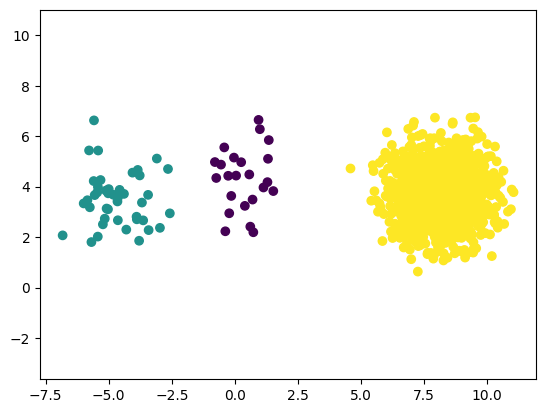

In [114]:
# make datasets und intro sklearn
from sklearn.datasets import make_classification,make_blobs
import matplotlib.pyplot as plt
X, y = make_blobs(n_samples=[23,42,1337],random_state=80)
plt.scatter(X[:,0],X[:,1],c=y)
plt.axis('equal')

In [115]:
# We will do some simple act
import numpy as np

def schwefel(x):
    """
    Schwefel function implementation.
    
    Parameters:
    x (array-like): Input array of variables.

    Returns:
    float: Schwefel function value at x.
    """
    x = np.asarray(x)
    n = len(x)
    return 418.9829 * n - np.sum(x * np.sin(np.sqrt(np.abs(x))))


x = [420.9687, 420.9687]  # Global minimum for two variables
result = schwefel(x)
print(f"Schwefel function value at {x}: {result}")

Schwefel function value at [420.9687, 420.9687]: 2.545567497236334e-05


In [116]:
#download data from: https://citrination.com/datasets/150128/show_files/
import json
path = "/home/mmr/how-to-python/Computerscience and Programming 24/VL_21.01.25/fega_formatted.json"
data = json.load(open(path,'r'))

In [117]:
#Wrange with compositions

# Initialize arrays
Fe_at_percent = []
Ga_at_percent = []
Pd_at_percent = []
xrd_patterns = []
# Extract composition

# Loop through the composition
for d in data:
    cmp = d['composition']
    for entry in cmp:
        if entry['element'] == 'Fe':
            Fe_at_percent.append(float(entry['actualAtomicPercent']['value']))
        elif entry['element']  == 'Ga':
            Ga_at_percent.append(float(entry['actualAtomicPercent']['value']))
        elif entry['element']  == 'Pd':
            Pd_at_percent.append(float(entry['actualAtomicPercent']['value']))
    xrd = [float(q['value']) for q in d['properties'][3]['scalars']]
    xrd_patterns.append(xrd)
angle = [float(q['value']) for q in d['properties'][3]['conditions'][0]['scalars']]
xrd_patterns = np.array(xrd_patterns).T

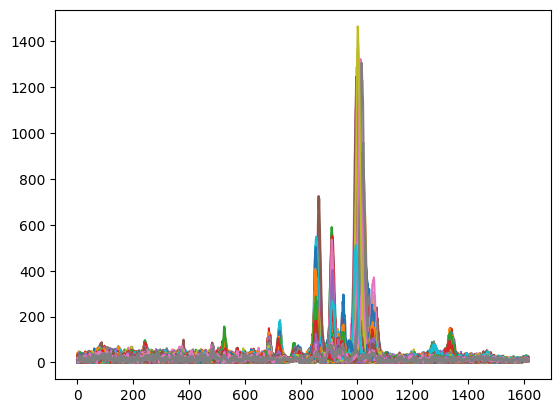

In [118]:
_ = plt.plot(xrd_patterns)


Text(0, 0.5, 'Intensity')

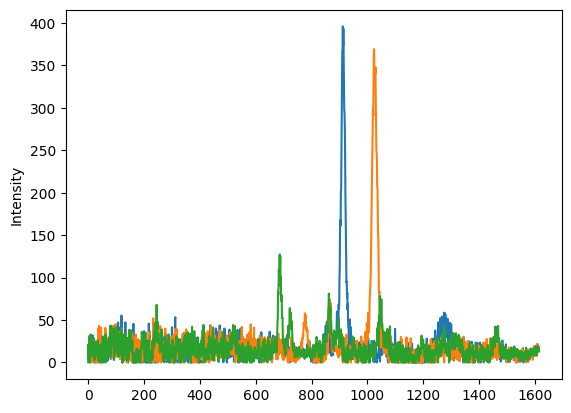

In [119]:
_ = plt.plot(xrd_patterns[:,42])
_ = plt.plot(xrd_patterns[:,99])
_ = plt.plot(xrd_patterns[:,202])

plt.ylabel('Intensity')


In [120]:
#plot compositions
import matplotlib.pyplot as plt
import numpy as np
def ternary_to_cartesian(Fe, Ga, Pd):
    # Ternary coordinates (Fe, Ga, Pd) -> Cartesian (x, y)
    x = 0.5 * (2 * Ga + Pd) / 100
    y = (np.sqrt(3) / 2) * Pd / 100
    return [x, y]

points = np.array([ternary_to_cartesian(Fe, Ga, Pd) for Fe, Ga, Pd in zip(Fe_at_percent, Ga_at_percent, Pd_at_percent)])

# Draw triangle edges
triangle_x = [0, 1, 0.5, 0]
triangle_y = [0, 0, np.sqrt(3) / 2, 0]

Text(0.5, 0.9160254037844386, 'Pd')

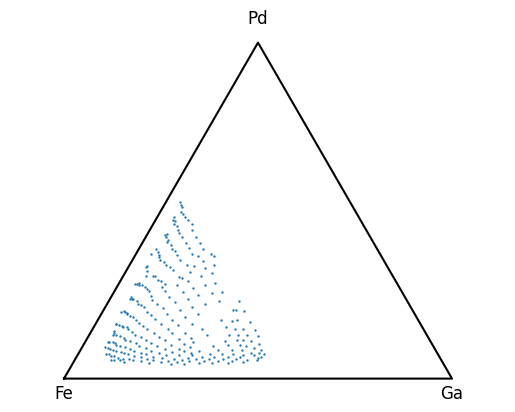

In [121]:
plt.plot(triangle_x,triangle_y,c='black')
plt.scatter(points[:,0],points[:,1],s=0.5)
plt.axis('equal')
plt.axis('off')
plt.text(0, -0.05, "Fe", ha='center', fontsize=12)
plt.text(1, -0.05, "Ga", ha='center', fontsize=12)
plt.text(0.5, np.sqrt(3) / 2 + 0.05, "Pd", ha='center', fontsize=12)

In [122]:
#we use PCA to visualize the XRD landscape
#!pip install scikit-learn
from sklearn.decomposition import PCA
meinePCA = PCA(n_components=2)
pcs = meinePCA.fit_transform(xrd_patterns.T)

In [123]:
from sklearn.manifold import MDS
meineMDS = MDS(n_components=2)
mds = meineMDS.fit_transform(xrd_patterns.T)

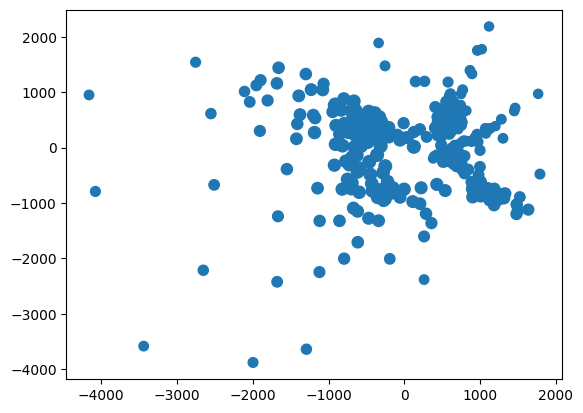

In [124]:
plt.scatter(mds[:,0],mds[:,1],s=Fe_at_percent)

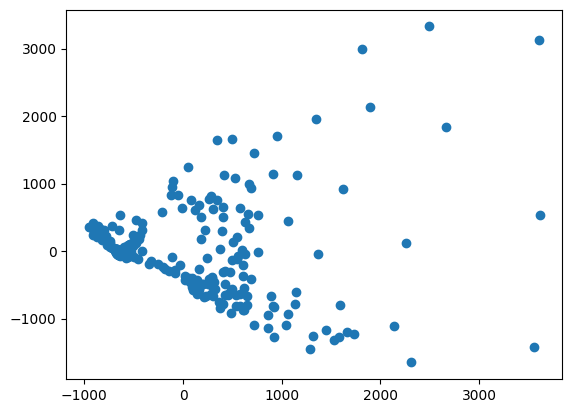

In [125]:
plt.scatter(pcs[:,0],pcs[:,1])

In [126]:
#we use K-means to cluster XRD patterns
#first we show this on the PCA scatter plot and then we show it on the ternary diagram


In [127]:
#now we use nnmf

from sklearn.decomposition import NMF
model = NMF(n_components=9, init='random', random_state=0)
W = model.fit_transform(xrd_patterns)
H = model.components_

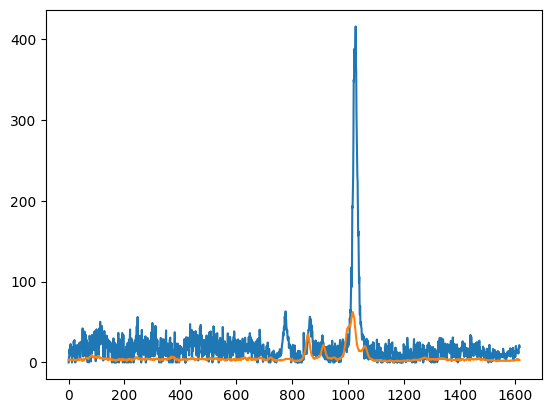

In [128]:
k = 65
plt.plot(xrd_patterns[:,k])
plt.plot(np.sum(W*H[0,k],axis=1))


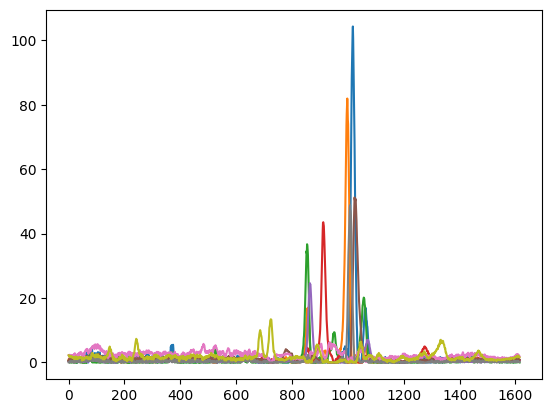

In [129]:
plt.plot(W)

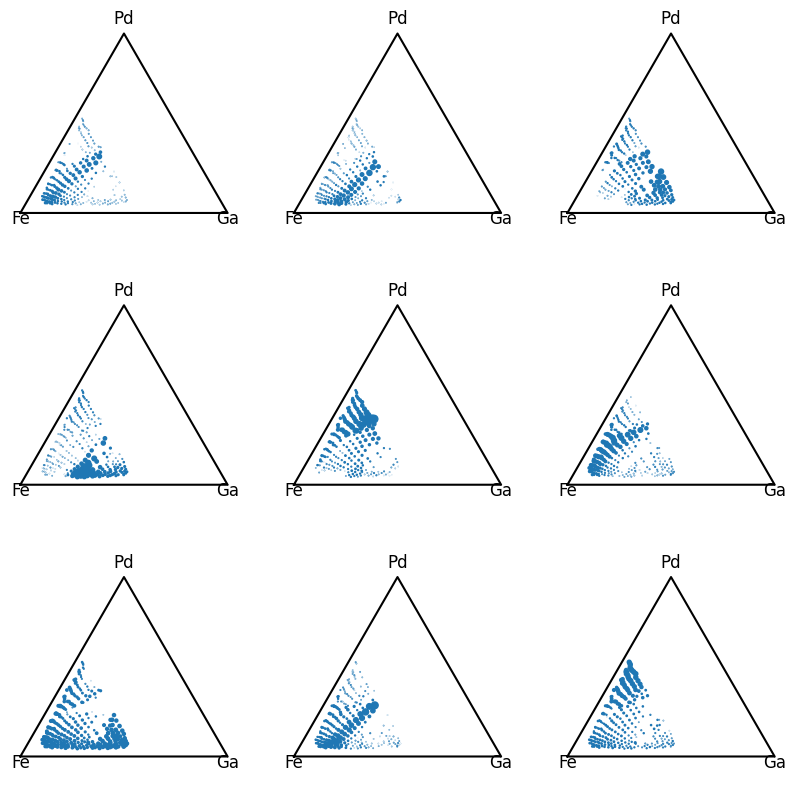

In [130]:
#plot some intensity of a phase over the ternary diagram as shown below!
fig,ax = plt.subplots(3,3,figsize=(10,10))
ax = ax.flatten()
for i,a in enumerate(ax):
    a.plot(triangle_x,triangle_y,c='black')
    a.scatter(points[:,0],points[:,1],s=H[i,:])
    a.axis('equal')
    a.axis('off')
    a.text(0, -0.05, "Fe", ha='center', fontsize=12)
    a.text(1, -0.05, "Ga", ha='center', fontsize=12)
    a.text(0.5, np.sqrt(3) / 2 + 0.05, "Pd", ha='center', fontsize=12)


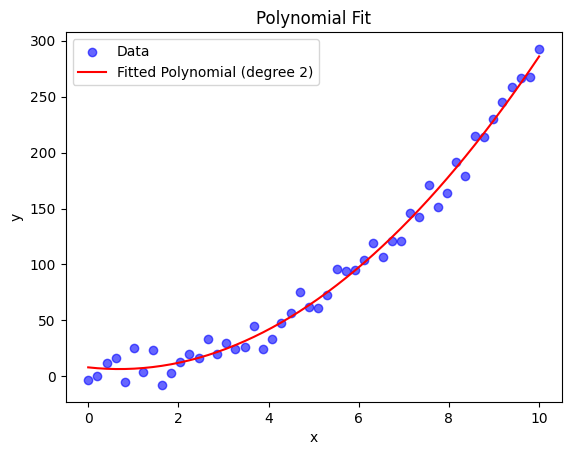

In [131]:
#wir machen ein wenig fitting einfachster funktionen um danach ein bisschen ML mit active learning / sequential learning zu machen

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 10, 50)  
y = 3 * x**2 - 2 * x + 5 + np.random.normal(scale=10, size=x.shape)  

# Polynomial fitting
degree = 2
coefficients = np.polyfit(x, y, degree)

polynomial = np.poly1d(coefficients)

x_fit = np.linspace(min(x), max(x), 50)
y_fit = polynomial(x_fit)

plt.scatter(x, y, label='Data', color='blue', alpha=0.6)
plt.plot(x_fit, y_fit, label=f'Fitted Polynomial (degree {degree})', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Fit')
plt.legend()
plt.show()

der R² Wert beträgt: 0.9880529608956123
der MSE Wert beträgt: 88.54936845865615


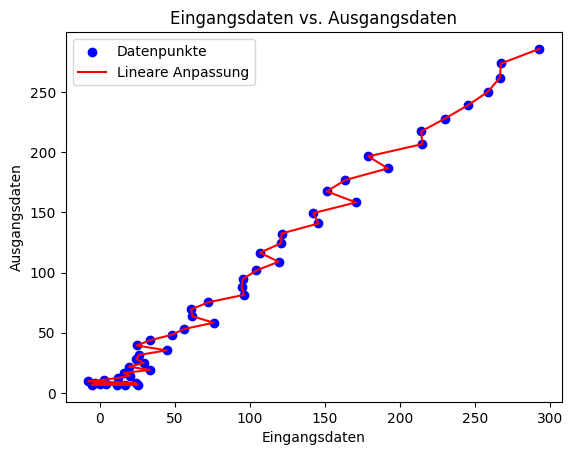

In [132]:
# berechnen Sie den r2 und den MSE. Plotten Sie die eingangsdaten vs. die Ausgangsdaten
import sklearn
import sklearn.metrics
r2 = sklearn.metrics.r2_score(y, y_fit)
print(f"der R² Wert beträgt: {r2}")
mse = sklearn.metrics.mean_squared_error(y, y_fit)
print(f"der MSE Wert beträgt: {mse}")

plt.scatter(y, y_fit, color='blue', label='Datenpunkte')
plt.plot(y, y_fit, color='red', label='Lineare Anpassung')
plt.xlabel('Eingangsdaten')
plt.ylabel('Ausgangsdaten')
plt.title('Eingangsdaten vs. Ausgangsdaten')
plt.legend()
plt.show()

der R² Wert beträgt: 0.9880529608956123
der MSE Wert beträgt: 88.54936845865615


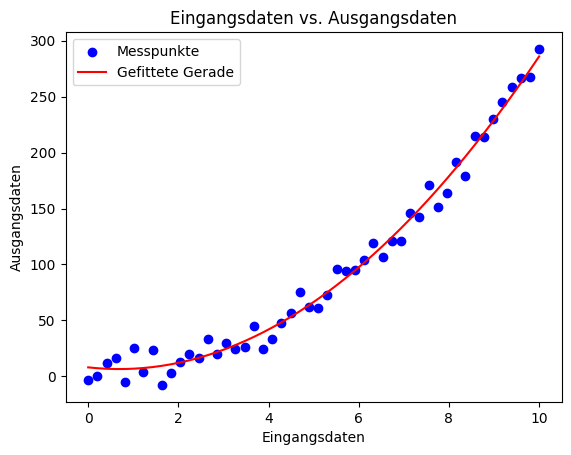

In [133]:
coefficients = np.polyfit(x, y, 2)
polynomial = np.poly1d(coefficients)
y_fit = polynomial(x)

# Berechnung von R² und MSE
r2 = sklearn.metrics.r2_score(y, y_fit)
print(f"der R² Wert beträgt: {r2}")
mse = sklearn.metrics.mean_squared_error(y, y_fit)
print(f"der MSE Wert beträgt: {mse}")

# Plotten der Messpunkte und der gefitteten Gerade
plt.scatter(x, y, color='blue', label='Messpunkte')
plt.plot(x, y_fit, color='red', label='Gefittete Gerade')
plt.xlabel('Eingangsdaten')
plt.ylabel('Ausgangsdaten')
plt.title('Eingangsdaten vs. Ausgangsdaten')
plt.legend()
plt.show()

/tmp/ipykernel_2889/556834416.py:14: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x, y, degree)


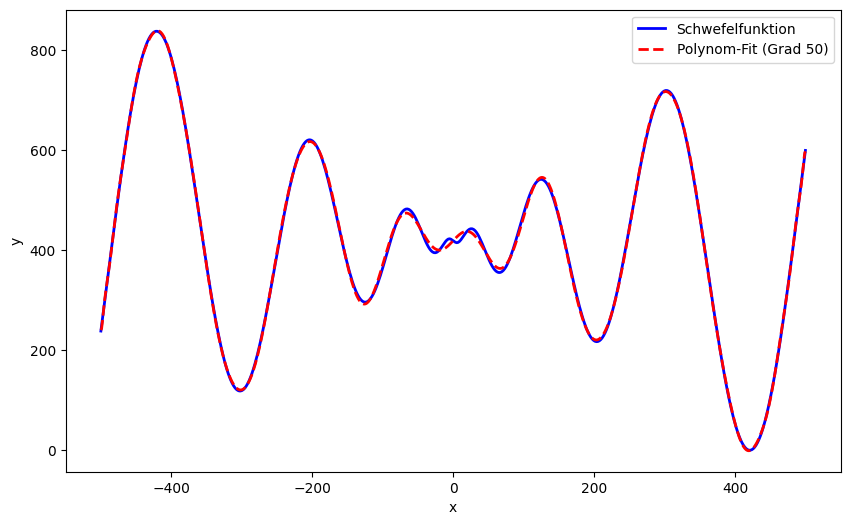

In [134]:
import numpy as np
import matplotlib.pyplot as plt

# Schwefelfunktion für 1D definieren
def schwefel(x):
    return 418.9829 - x * np.sin(np.sqrt(np.abs(x)))

# Daten generieren
x = np.linspace(-500, 500, 500)  # Wertebereich von -500 bis 500
y = schwefel(x)  # Schwefelfunktion berechnen

# Polynomial fitting (z. B. Grad 5)
degree = 50
coefficients = np.polyfit(x, y, degree)
polynomial = np.poly1d(coefficients)

# Fit auswerten
x_fit = np.linspace(min(x), max(x), 1000)
y_fit = polynomial(x_fit)

# Plot erstellen
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Schwefelfunktion', color='blue', linewidth=2)
plt.plot(x_fit, y_fit, label=f'Polynom-Fit (Grad {degree})', color='red', linestyle='--', linewidth=2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Was wäre nun wenn ich möglichst wenig punkte messen wollen würde?

Wir bauen ein ensemble Modell und nutzen es zur Vorhersage inkl. Unsicherheit!

Dazu brauchen wir mehrere Schritte!

In [135]:
#wir setzen uns eine infrastruktur für sequentielles lernen auf ...
import numpy as np

x_test = [float(x) for x in np.linspace(-500,500,1000)]

x_train = []
y_train = []
for i in range(20):
    x_train.append(x_test.pop(np.random.randint(0,len(x_test))))
    y_train.append(schwefel(x_train[-1]))

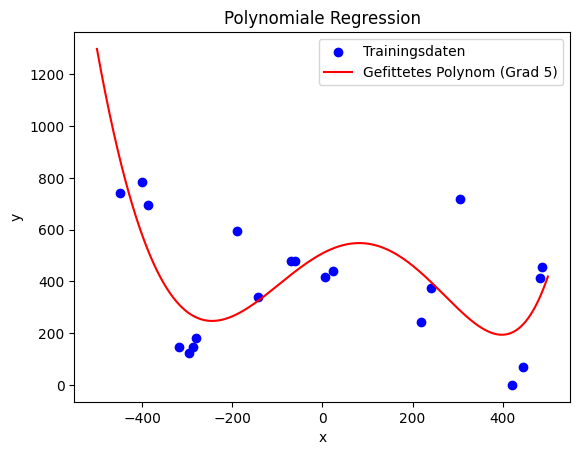

In [136]:
# fitten sie nun ein polynom an diese daten und plotten Sie das Ergebnis!
degree = 5  # Grad des Polynoms
coefficients = np.polyfit(x_train, y_train, degree)
polynomial = np.poly1d(coefficients)

# Berechnung der gefitteten Werte
x_fit = np.linspace(-500, 500, 1000)
y_fit = polynomial(x_fit)

# Plotten der Trainingsdaten und der gefitteten Kurve
plt.scatter(x_train, y_train, color='blue', label='Trainingsdaten')
plt.plot(x_fit, y_fit, color='red', label=f'Gefittetes Polynom (Grad {degree})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomiale Regression')
plt.legend()
plt.show()

In [137]:
# generieren Sie nun aus Ihren (wenigen) Messdaten neue datensätze (sagen wir 100) in welchen Sie immer 10% zufällig nicht betrachten.
# Fitten Sie dann ein polynom für jeden dieser datensätze - wir werden diese polynome gleich wieder brauchen
models = []
for n in range(100):
    ix_temp = np.random.choice(np.arange(len(x_train)), size=int(len(x_train)*0.9), replace=False)    
    x_temp = np.array(x_train)[ix_temp]
    y_temp = np.array(y_train)[ix_temp]
    degree = min([len(x_temp), 50])
    coefficients = np.polyfit(x_temp, y_temp, degree)
    models.append(np.poly1d(coefficients))

/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning

(-1000.0, 20000.0)

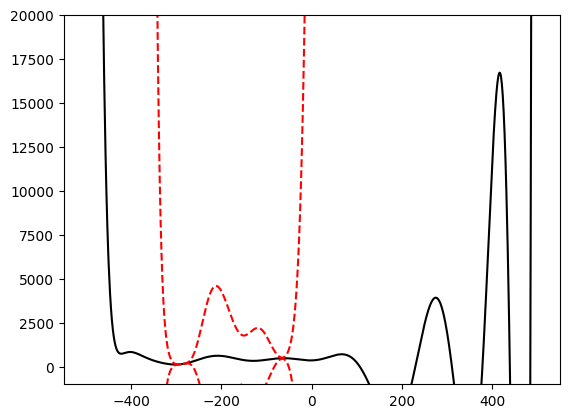

In [138]:
# sagen Sie mit jedem der 100 Modelle (die ja alle elicht unterschiedlich viele daten gesehen haben) für alle x-werte die y-werte vorraus!
# Das Sie 100 Modelle haben können Sie nun den mittwelwert und die varianz berechnen
prediction = np.array([m(x_test) for m in models])
_ = plt.plot(x_test,np.mean(prediction.T,axis=1), color='black')
_ = plt.plot(x_test,np.mean(prediction.T,axis=1)+np.var(prediction.T, axis= 1), '--', color='red')
_ = plt.plot(x_test,np.mean(prediction.T,axis=1)-np.var(prediction.T, axis= 1), '--', color='red')

plt.ylim(-1000, 20000)

In [139]:
# plotten Sie die tatsächliche Schwefel Funktion, ihren mittwelwert und die Varianz

In [140]:
# schreiben Sie code welcher den punkt mit mu*0.5+sigma*0.5 hat - also wo die unsicherheit und der vorhersagewert groß ist!
aq_fcn = 0.5*np.mean(prediction.T, axis = 1)+0.5*np.var(prediction.T, axis = 1)

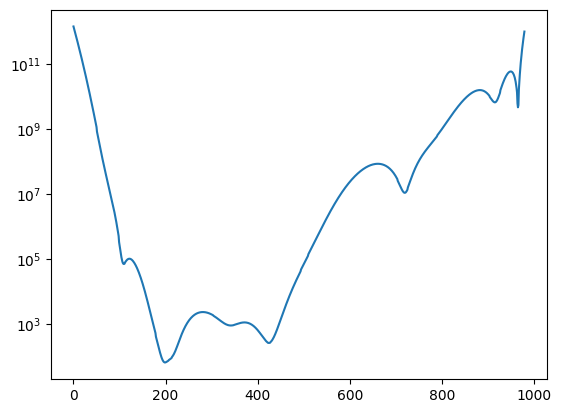

In [141]:
plt.semilogy(aq_fcn)

In [142]:
x_train.append(x_test.pop(np.argmax(aq_fcn)))
y_train.append(schwefel(x_train[-1]))

In [143]:
# generieren Sie nun aus Ihren (wenigen) Messdaten neue datensätze (sagen wir 100) in welchen Sie immer 10% zufällig nicht betrachten.
# Fitten Sie dann ein polynom für jeden dieser datensätze - wir werden diese polynome gleich wieder brauchen
models = []
for n in range(100):
    ix_temp = np.random.choice(np.arange(len(x_train)), size=int(len(x_train)*0.9), replace=False)    
    x_temp = np.array(x_train)[ix_temp]
    y_temp = np.array(y_train)[ix_temp]
    degree = min([len(x_temp), 50])
    coefficients = np.polyfit(x_temp, y_temp, degree)
    models.append(np.poly1d(coefficients))

/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/1608939566.py:9: RankWarning

/tmp/ipykernel_2889/2213612907.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/2213612907.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/2213612907.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/2213612907.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/2213612907.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/2213612907.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/2213612907.py:11: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_temp, y_temp, degree)
/tmp/ipykernel_2889/2213612907.py:11: Ran

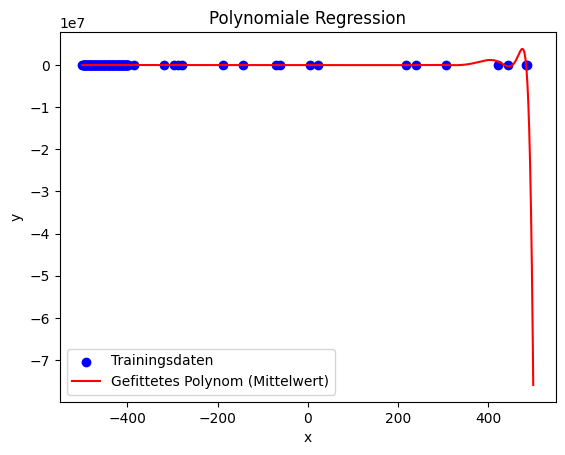

In [144]:
for all_ in range(100):
    x_train.append(x_test.pop(np.argmax(aq_fcn)))
    y_train.append(schwefel(x_train[-1]))

    models = []
    for n in range(100):
        ix_temp = np.random.choice(np.arange(len(x_train)), size=int(len(x_train)*0.9), replace=False)    
        x_temp = np.array(x_train)[ix_temp]
        y_temp = np.array(y_train)[ix_temp]
        degree = min([len(x_temp), 50])
        coefficients = np.polyfit(x_temp, y_temp, degree)
        models.append(np.poly1d(coefficients))
    aq_fcn = 0.5*np.mean(prediction.T, axis = 1)+0.5*np.var(prediction.T, axis = 1)

# Berechnung der gefitteten Werte für jedes Modell
y_fits = [model(x_fit) for model in models]

# Mittelwert der gefitteten Werte berechnen
y_fit_mean = np.mean(y_fits, axis=0)

plt.scatter(x_train, y_train, color='blue', label='Trainingsdaten')
plt.plot(x_fit, y_fit_mean, color='red', label='Gefittetes Polynom (Mittelwert)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomiale Regression')
plt.legend()
plt.show()